In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.models import load_model, Model
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate

warnings.filterwarnings('ignore')
%matplotlib inline

print('finished!')

finished!


In [8]:
dataset = pd.read_csv('F:/recommender_jk/goodbooks-10k-master/ratings.csv')
dataset.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [12]:
test.shape

(1195296, 3)

In [13]:
n_users = len(dataset.user_id.unique())
n_books = len(dataset.book_id.unique())

n_users, n_books

(53424, 10000)

In [14]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

print('start 111')

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

print('start 222')

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

print('start 333')

start 111
start 222
start 333


In [ ]:
history = model.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1)
model.save('regression_model.h5')

In [18]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [19]:
model.evaluate([test.user_id, test.book_id], test.rating)

1195296/1195296 [==============================] - 84s 70us/step


0.74374745724795

In [20]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[3.311925] 3
[3.2362769] 4
[5.4044433] 5
[2.2632942] 2
[3.5510306] 4
[4.0801296] 4
[4.21493] 4
[3.9315915] 4
[4.7625546] 5
[2.8466601] 4


[None, None, None, None, None, None, None, None, None, None]

In [22]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

get here !
Epoch 1/5
4781183/4781183 [==============================] - 822s 172us/step - loss: 0.7744
Epoch 2/5
4781183/4781183 [==============================] - 832s 174us/step - loss: 0.7238
Epoch 3/5
4781183/4781183 [==============================] - 842s 176us/step - loss: 0.7027
Epoch 4/5
4781183/4781183 [==============================] - 778s 163us/step - loss: 0.6840
Epoch 5/5
4781183/4781183 [==============================] - 768s 161us/step - loss: 0.6717


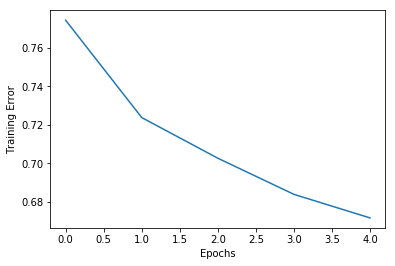

In [23]:
if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    print('get here !')
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [17]:
# len('AF14AC527A7CDF105046B52F44C9D7F3')
len('25E7F00C893376E9790174B592D866AE')

32